# Car Price Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import os
%matplotlib inline 

#Importing Deep Learning Modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('bmw_pricing_challenge.csv')

In [3]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
data.shape

(4843, 18)

In [5]:
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,4843.0,140962.799504,60196.740703,-64.0,102913.5,141080.0,175195.5,1000376.0
engine_power,4843.0,128.988230,38.993360,0.0,100.0,120.0,135.0,423.0
price,4843.0,15828.081767,9220.285684,100.0,10800.0,14200.0,18600.0,178500.0


In [7]:
data.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [8]:
data['registration_date']=pd.to_datetime(data['registration_date'])
data['sold_at']=pd.to_datetime(data['sold_at'])

In [9]:
data[data['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [12]:
data.at[2938, 'mileage'] = 64

In [13]:
data[data['mileage']==64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


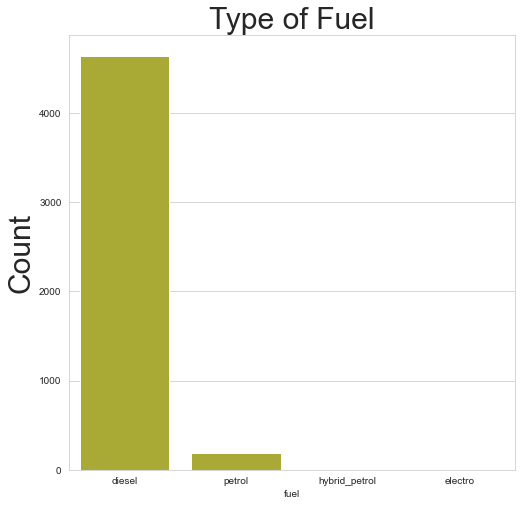

In [15]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=30)
plt.ylabel('Count',fontsize=30)

locs, labels = plt.xticks()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'diesel'),
  Text(1, 0, 'petrol'),
  Text(2, 0, 'hybrid_petrol'),
  Text(3, 0, 'electro')])

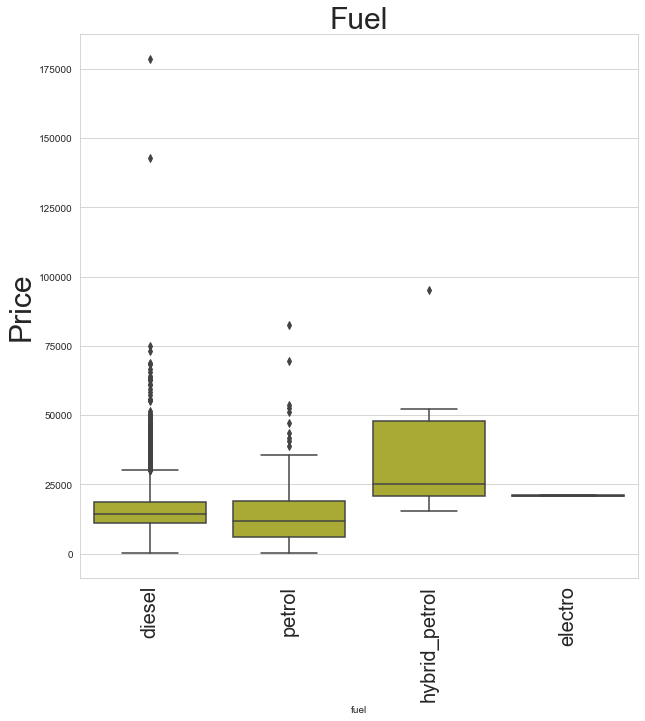

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='fuel',y='price',color=base_color,order=data.fuel.value_counts().index);
plt.title('Fuel',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

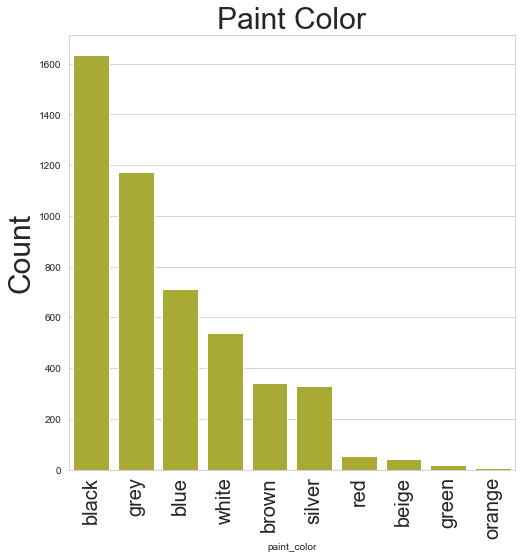

In [17]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='paint_color',color=base_color,order=data.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

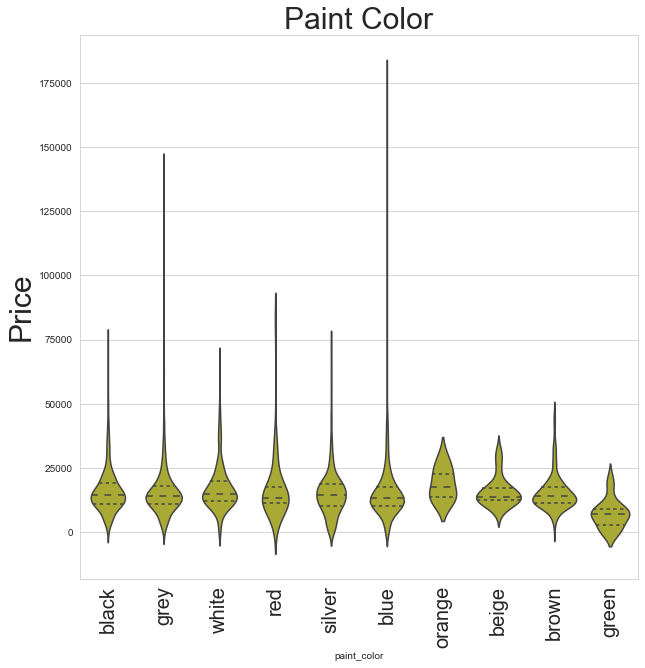

In [18]:
#Let see how the color is related to price in the resale market . THe data is has more points for black , grey and blue

plt.figure(figsize=(10,10));
sns.violinplot(data=data,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=30);
#plt.xlabel('Paint Color',fontsize=30);
plt.title("Paint Color",fontsize=30);
plt.xticks(rotation=90,fontsize=20);

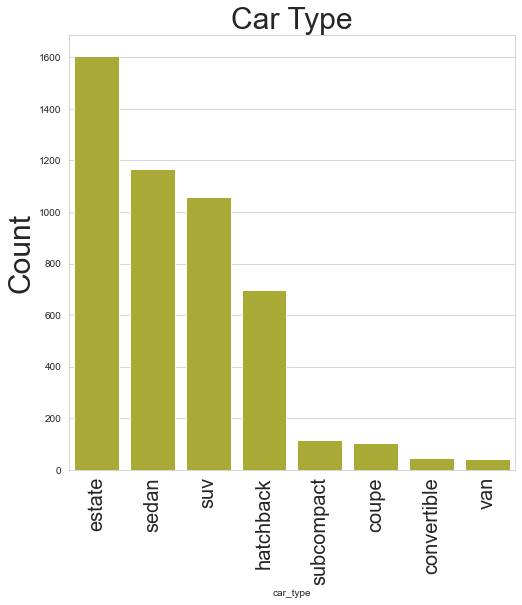

In [19]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='car_type',color=base_color,order=data.car_type.value_counts().index)
plt.title('Car Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'estate'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'suv'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'subcompact'),
  Text(5, 0, 'coupe'),
  Text(6, 0, 'convertible'),
  Text(7, 0, 'van')])

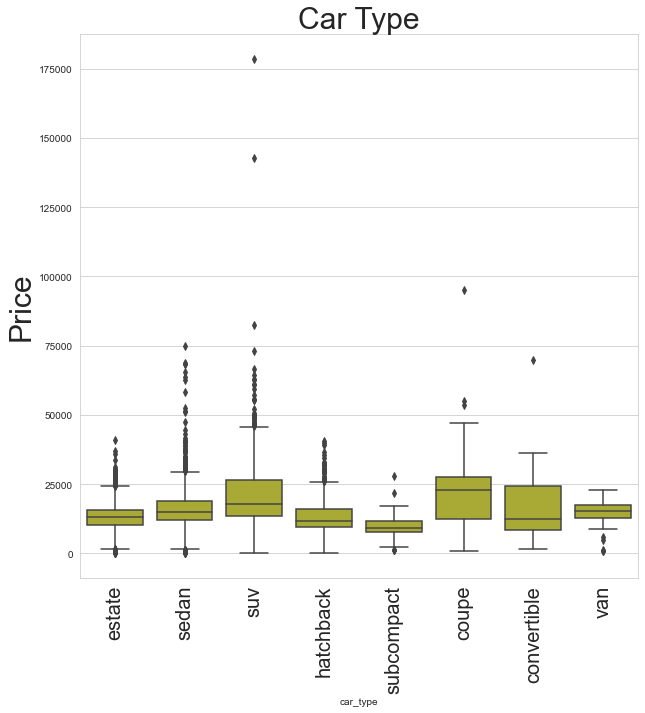

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='car_type',y='price',color=base_color,order=data.car_type.value_counts().index);
plt.title('Car Type',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

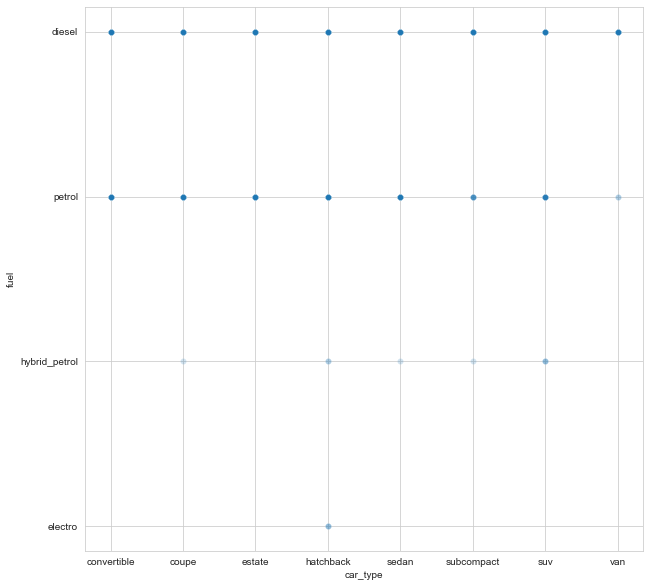

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='car_type',y='fuel',alpha=0.2,x_jitter=0.2);